# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

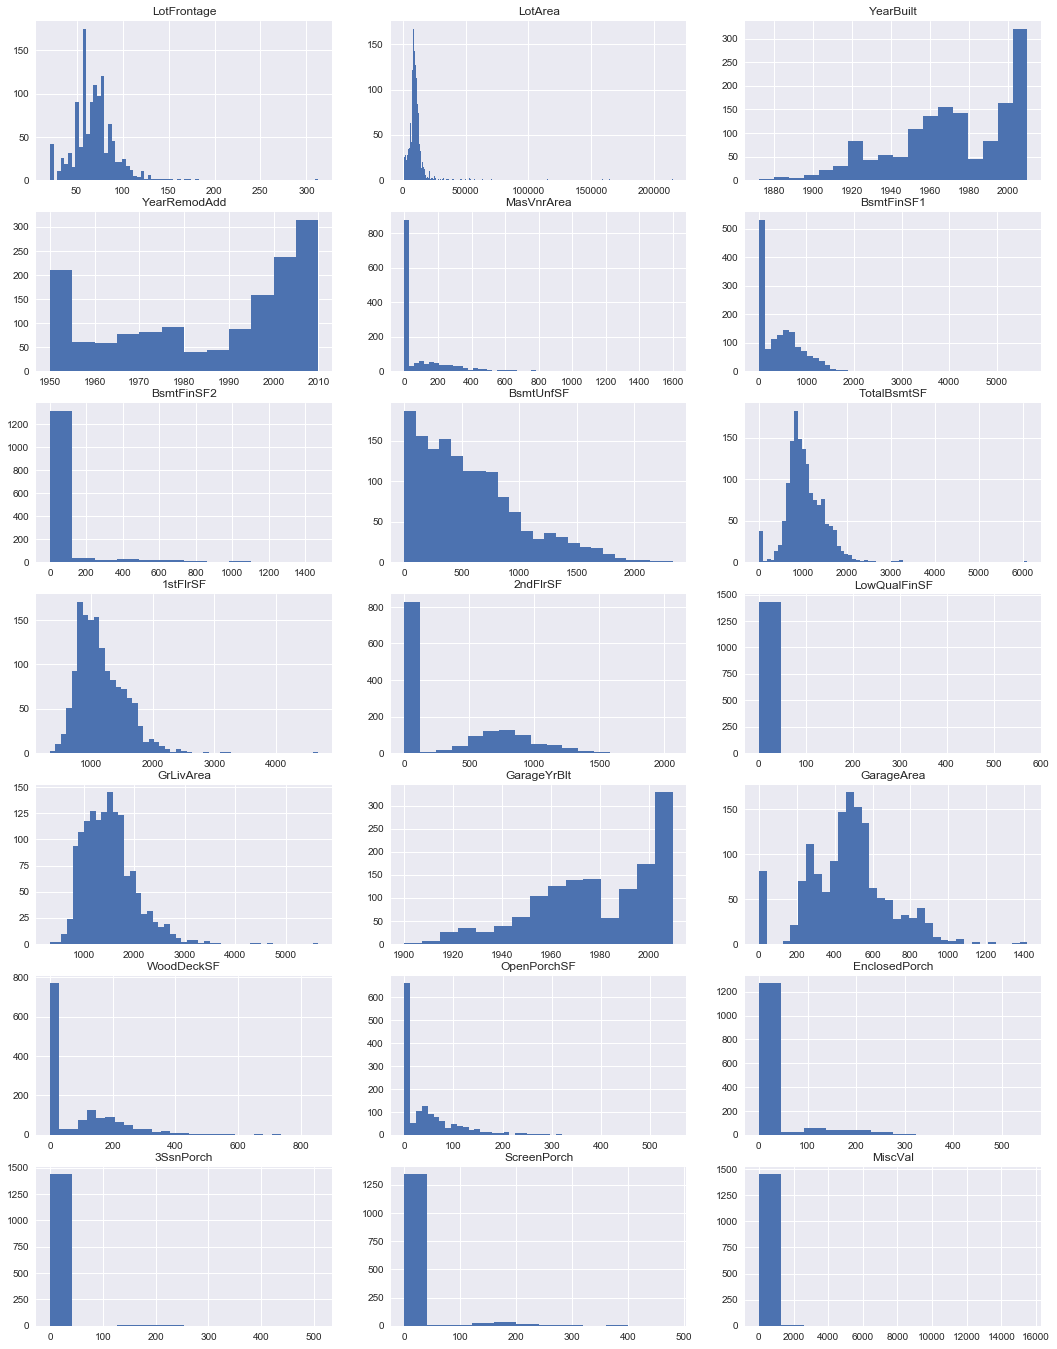

In [42]:
# Your code here
ames_prediction = ames.loc[:, ((ames.dtypes!='object')&(ames.nunique()>=20))]
cat = [column for column in ames_prediction.columns if column !='Id']
fig, axes = plt.subplots(ames_prediction.shape[1]//3, 3, figsize=(18,24))
for col, ax in zip(cat, axes.flatten()):
    ax.hist(ames[col].dropna(), bins='auto')
    ax.set_title(col)

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [44]:
# Select non zero-inflated continuous features as ames_cont
ames_cont = ames[['LotFrontage', 'LotArea', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'SalePrice']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204B38B11D0>,
      dtype=object)

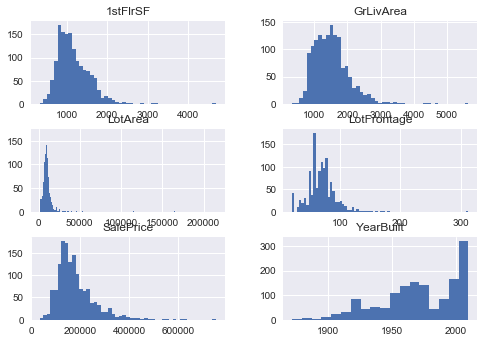

In [45]:
ames_cont.hist(bins='auto')

## Perform log transformations for the variables where it makes sense

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204B5E32438>,
      dtype=object)

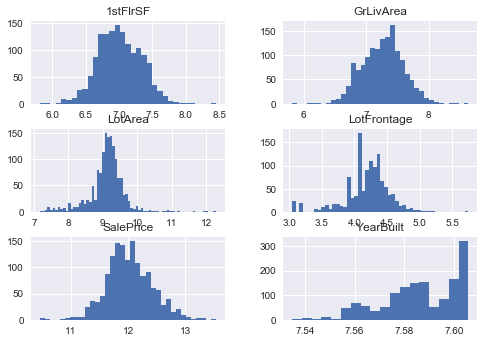

In [46]:
# Your code here
import numpy as np
amesLog = np.log(ames_cont)
amesLog.hist(bins='auto')

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204B836DE10>,
      dtype=object)

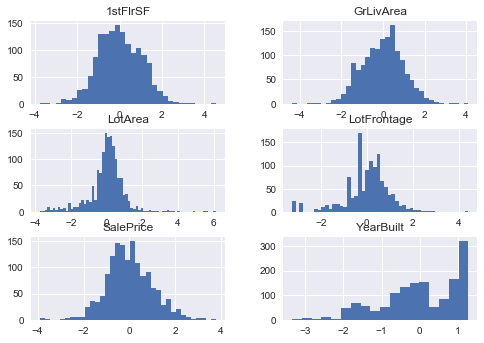

In [52]:
# Your code here
def normalize(log):
    return (log - log.mean())/log.std()
features_final = normalize(amesLog)
features_final.hist(bins='auto')

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!